<a href="https://colab.research.google.com/github/Abhishekpratapsingh321/Insurance_premium_prediction/blob/main/Insurance_premium__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.shape

(1338, 7)

In [ ]:
#before moving forward let's look whether this data contains any null value or not
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

It does not contain any null value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
corr=df.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

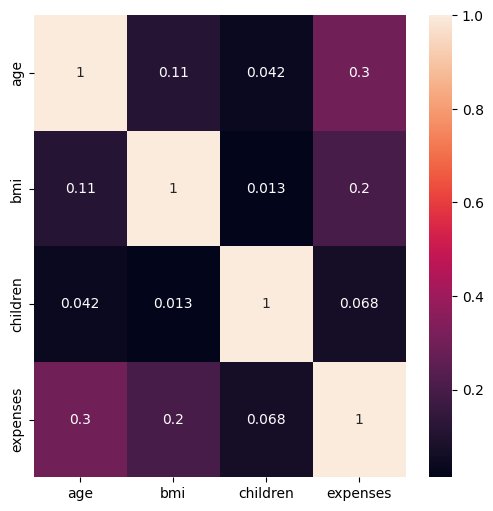

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

## EDA

Univariate

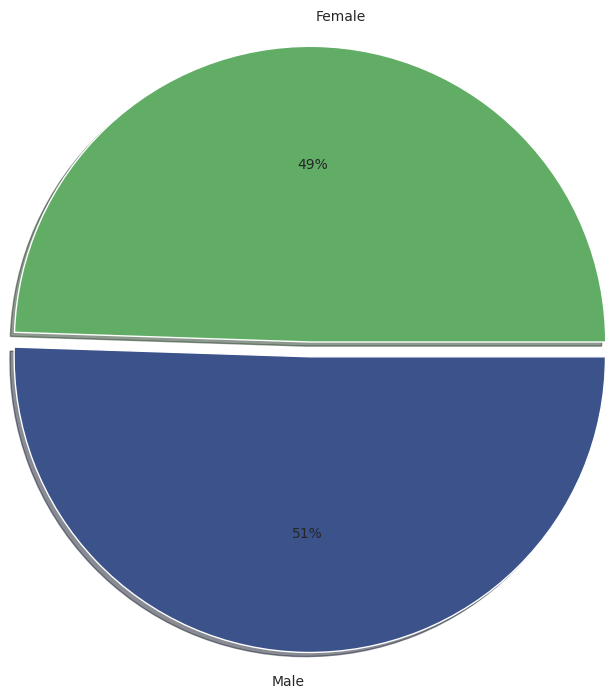

In [ ]:
sns.set_style(style="darkgrid",rc={"grid_color":".8","grid_linestyle":"--"})
out_df=pd.DataFrame(df.groupby('sex')['sex'].count())
colors=["#61ad66","#3b528b"]
plt.pie(out_df['sex'],labels=['Female','Male'],autopct="%.0f%%",colors=colors,radius=2,explode=(0,0.1),shadow=True)
plt.show()

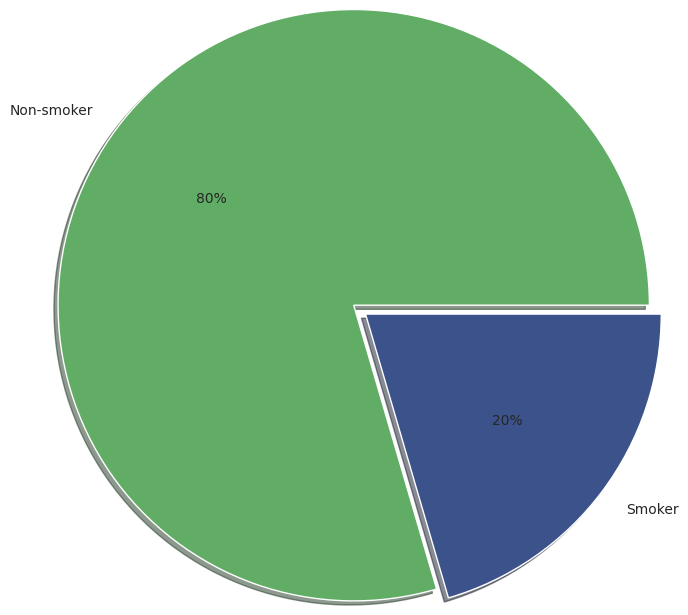

In [ ]:
sns.set_style(style="darkgrid",rc={"grid_color":".8","grid_linestyle":"--"})
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors=["#61ad66","#3b528b"]
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct="%.0f%%",colors=colors,radius=2,explode=(0,0.1),shadow=True)
plt.show()

In [ ]:
def plot(column):
   plt.figure(figsize=(10,5))
   sns.set_style(style="darkgrid",rc={"grid.color":".8","grid.linestyle":"--"})
   sns.distplot(df[column],bins=15,color="darkgreen")
   plt.tight_layout()
   plt.grid(True)
   plt.show

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

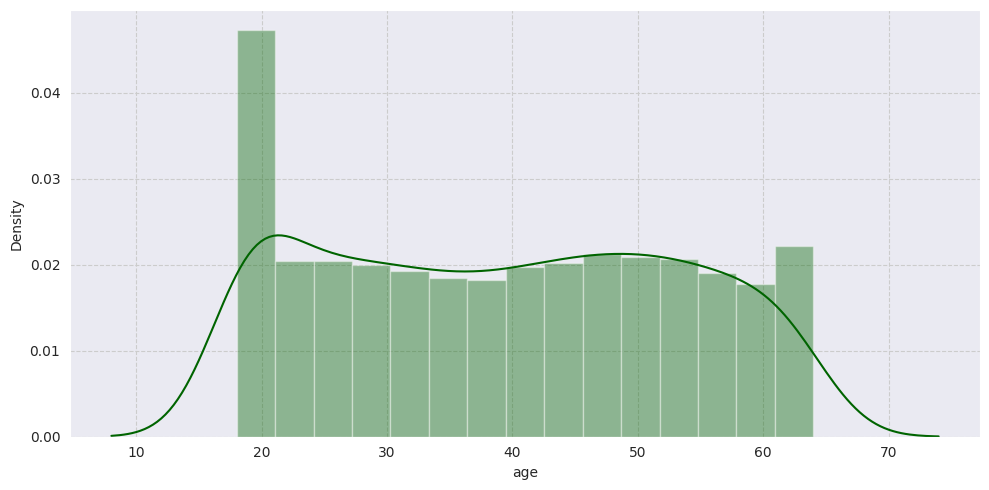

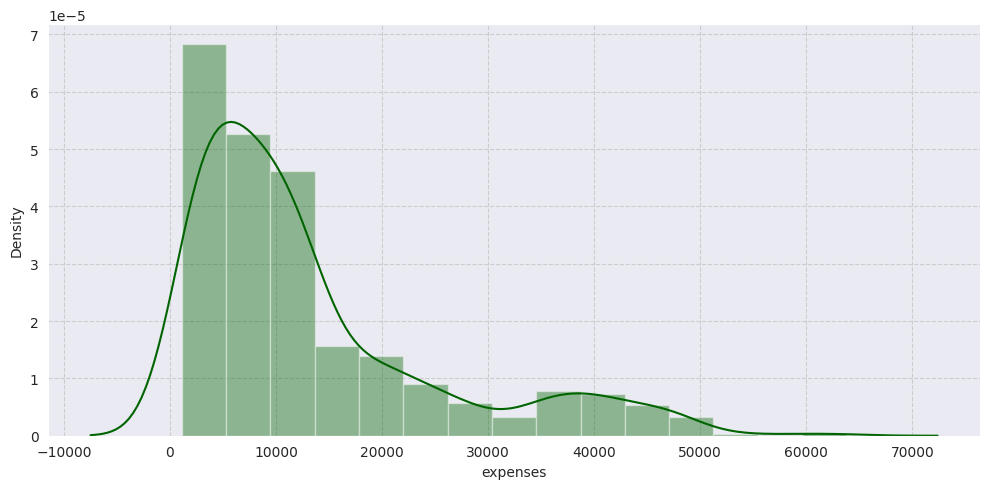

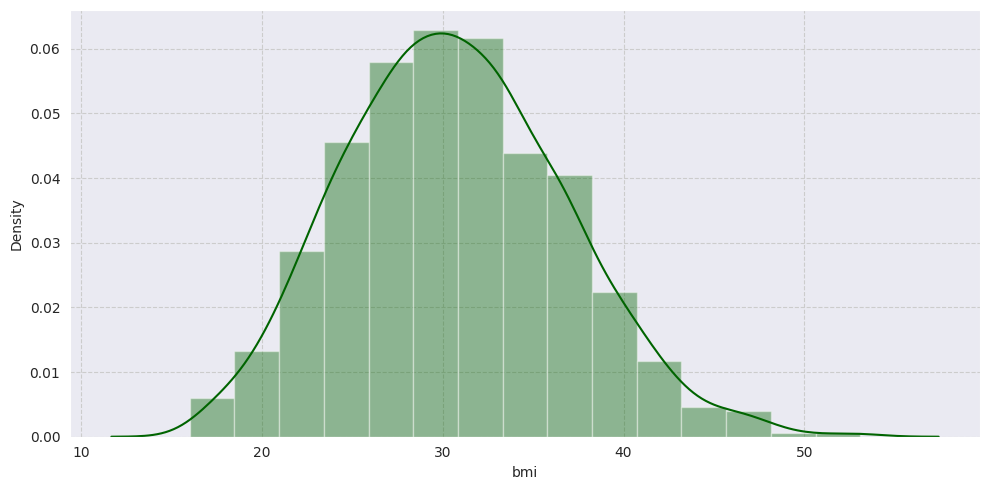

In [ ]:
column_name=["age","expenses","bmi"]
for i in column_name:
  plot(i)

In [ ]:
def plot1(column):
  plt.figure(figsize=(10,5))
  sns.set_style(style="darkgrid",rc={"grid.color":".8","grid.linestyle":"--"})
  sns.countplot(x=df[column],palette="viridis",saturation=0.8,edgecolor="black")
  plt.tight_layout()
  plt.grid(True)
  plt.show
  

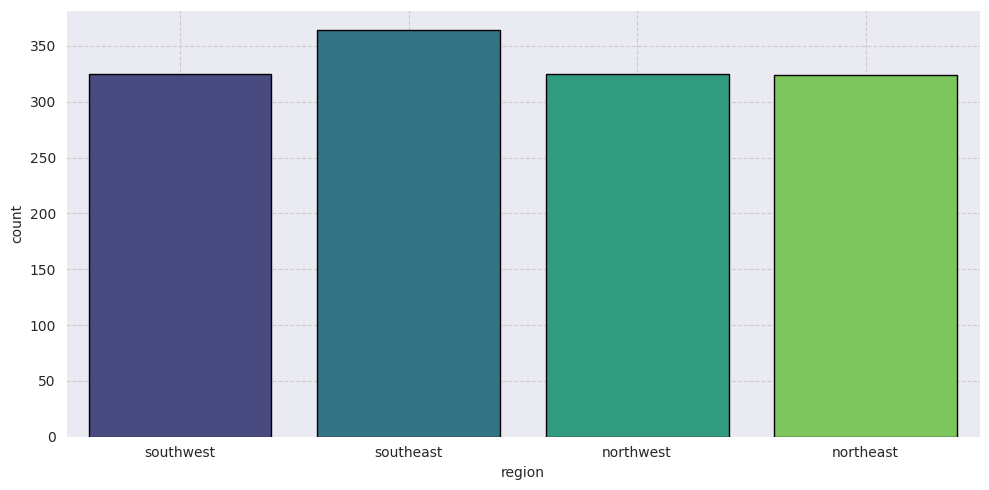

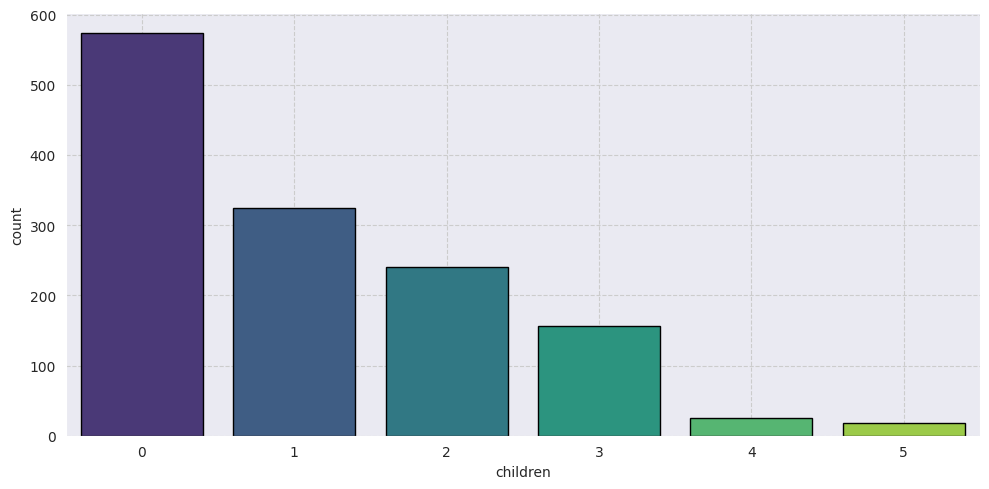

In [ ]:
column_name=['region','children']
for i in column_name:
  plot1(i)

Multivariate Analysis

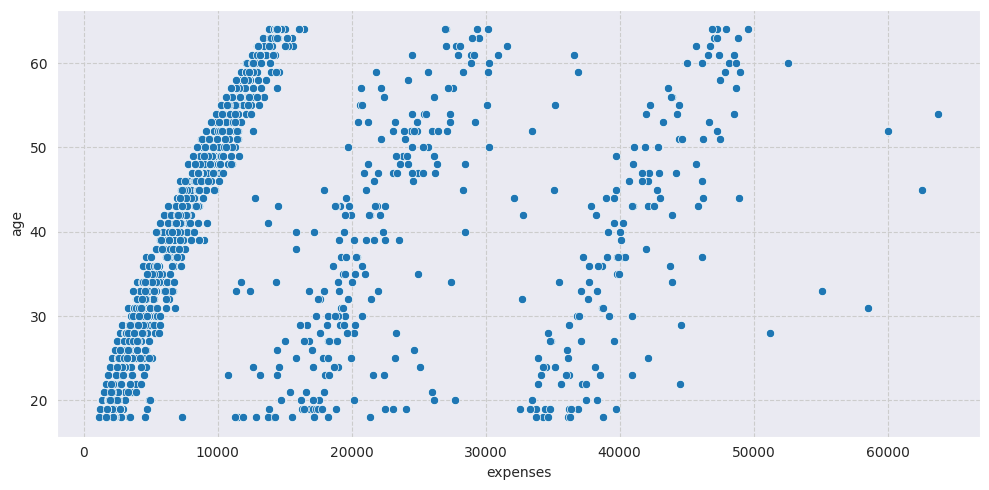

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style(style="darkgrid",rc={'grid.color':'0.8','grid.linestyle':'--'})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdY1Gn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

In this graph we can see younger applicant have lower expenses and older applicants have higher expenses

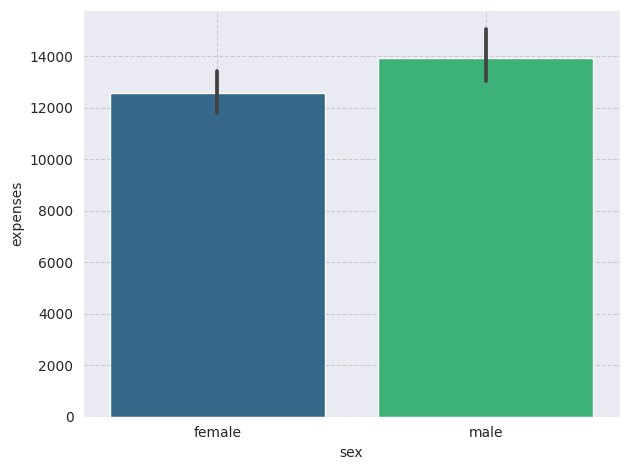

In [ ]:
sns.barplot(x='sex',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Male applicant are bit higher than female applicant

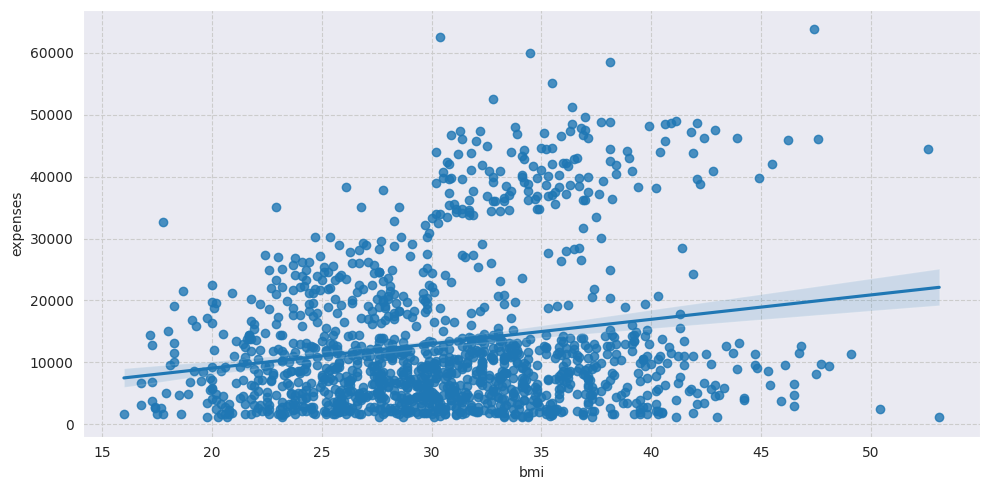

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid',rc={'grid.color':'.8','grid.linestyle':'--'})
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

There is positive relation between bmi and expenses

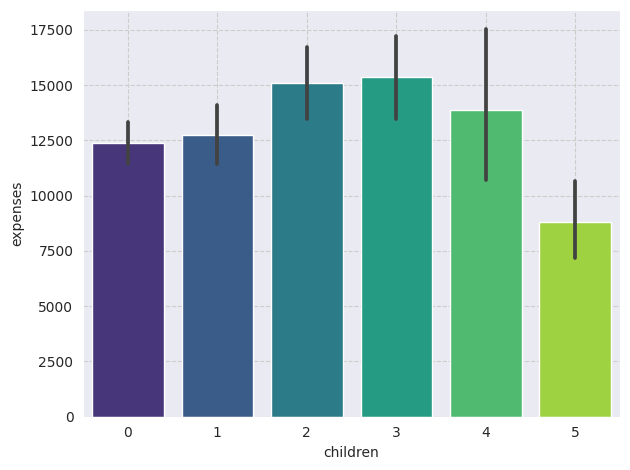

In [ ]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Applicant with 2 or 3 children have higher expenses and Applicant with 5 children have low expenses

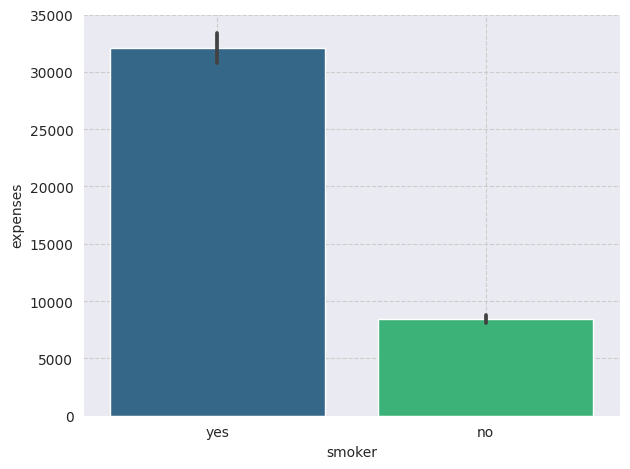

In [ ]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Smokers have insurance of high expense.

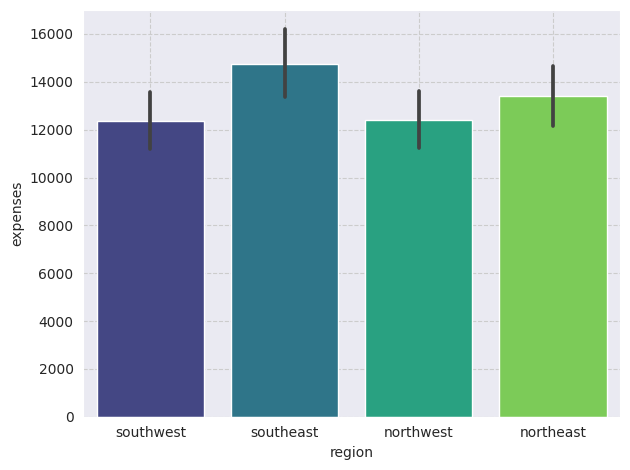

In [ ]:
sns.barplot(x='region',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

# Data Prepocessing

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Converting the categorical columns to dummy varibales

In [ ]:
def cat2col(data,col):
  dummy=pd.get_dummies(data[col],drop_first=True)
  data.drop(col,axis=1,inplace=True)
  data=pd.concat([data,dummy],axis=1)
  return data

In [ ]:
for i in df.columns:
    if df[i].dtype==object:
      print(i)
      df=cat2col(df,i)

sex
smoker
region


In [ ]:
df.head()

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


**Train-Test split**

In [ ]:
x=df.drop('expenses',axis=1)
y=df.expenses

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Model Fitting**

In [ ]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  

In [ ]:
def model_summary(model,model_name,cvn=20):
  print(model_name)
  y_pred_model_train=model.predict(x_train)
  y_pred_model_test=model.predict(x_test)
  R2Score_model_train=r2_score(y_train,y_pred_model_train)
  print('Training R2 score: ',R2Score_model_train)
  R2Score_model_test=r2_score(y_test,y_pred_model_test)
  print('Testing R2 score: ',R2Score_model_test)
  RMSE_model_train = sqrt(mean_squared_error(y_train,y_pred_model_train)) 
  print("RMSE for Training Data:",RMSE_model_train)
  RMSE_model_test = sqrt(mean_squared_error(y_test,y_pred_model_test)) 
  print("RMSE for Testing Data:",RMSE_model_test)


  y_pred_cv_model = cross_val_predict(model,x,y,cv=cvn)
  accuracy_cv_model = r2_score(y,y_pred_cv_model)
  print("Accuracy for",cvn,"- Fold Cross Prdicted:",accuracy_cv_model) 





**1.Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_summary(regressor,"Multiple_Linear_Regression")

Multiple_Linear_Regression
Training R2 score:  0.7417509671301924
Testing R2 score:  0.7835726930039906
RMSE for Training Data: 6105.245134876944
RMSE for Testing Data: 5796.556335884076
Accuracy for 20 - Fold Cross Prdicted: 0.7466981000116759


**2.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5,random_state=13)
decision_tree_reg.fit(x_train,y_train)
model_summary(decision_tree_reg,"Decision_Tree_Regression")

Decision_Tree_Regression
Training R2 score:  0.8802653728701169
Testing R2 score:  0.8337942815785109
RMSE for Training Data: 4157.130302241068
RMSE for Testing Data: 5079.687719055627
Accuracy for 20 - Fold Cross Prdicted: 0.8526576923067526


**3.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)
model_summary(random_forest_reg,"Random_Forest_Regression")

Random_Forest_Regression
Training R2 score:  0.9759468538933854
Testing R2 score:  0.8627689301161011
RMSE for Training Data: 1863.2438609785831
RMSE for Testing Data: 4615.728526189386
Accuracy for 20 - Fold Cross Prdicted: 0.8357211783146726


**4.XGBoost**

In [ ]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123,verbose=0)
xgb_r.fit(x_train,y_train)
pred=xgb_r.predict(x_test)

[09:49:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:56] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [ ]:
model_summary(xgb_r,"Xg_boost")

Xg_boost
Training R2 score:  0.9104586585461639
Testing R2 score:  0.8752086117653118
RMSE for Training Data: 3594.9723342340676
RMSE for Testing Data: 4401.5571112359
[09:50:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[09:50:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[09:50:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[09:50:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[09:50:55] WARNI